Import Packages

In [162]:
from math import sqrt
import ast
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

Read the Data files

In [163]:
data_array=[]
for file in range(1000):
  
  print(file,end=" ")
  #read the csv and store it as dataframe
  data=pd.read_csv("/content/drive/My Drive/Smart Health/Assignment_2/Assignment 2 - Question/DS/data"+str(file)+".csv",header=None)

  #data is a dataframe and at index 0 we have the target value i.e optimizized value
  target=float((data.iloc[0])[0].split(":")[1])

  #Concatenating the remaining data in the file(except the target) in to string
  #Generating a 50*50 matrix in string format
  matrix=data.iloc[1:][0]
  data_str=""
  for items in matrix.iteritems():
    data_str=data_str+items[1]
  
  #Divide the string in to list using the delimiter ]. 
  #what you have now is a list of strings 
  #example l[0]= first row of 50*50 matrix stored as string
  l=data_str[1:-1].split("]")
  
  #final_matrix stores the entire 50*50 matrix as a single row (for each file)
  final_matrix=[]
  
  #iterate over each string row of the 50*50 matrix
  #replace the space with ',' and
  #covert the string row to actual list
  for x in l:
    if(x!=''):
      # replace the spaces between the number in the string with ','
      temp=re.sub(r'(\s+)',r',',x.strip()[1:].strip())
      # Convert the string into a actual list and add it to final_matrix
      final_matrix=final_matrix + (ast.literal_eval("["+temp+"]"))

  #attach the target to the row
  final_matrix.append(target)

  #Data_array contains the complete table of dimension 1000*2501 (+1 for target)
  data_array.append(final_matrix)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [164]:
#create a dataframe 
df = pd.DataFrame(data_array)

In [165]:
df.shape

(1000, 2501)

In [166]:
#display the top ten rows of the dataframe
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,156,499,284,25,300,40,346,108,190,458,358,320,124,93,283,103,64,273,449,225,487,54,497,420,207,204,175,423,301,20,306,139,354,36,326,79,345,435,295,443,...,316,30,236,293,230,205,484,77,89,366,240,419,225,325,136,214,24,85,472,478,470,371,154,410,374,94,395,468,25,315,348,312,420,295,327,68,271,302,47,1606.0
1,84,46,272,52,329,217,387,107,337,69,199,392,483,153,279,356,322,153,119,100,75,175,202,402,401,426,68,289,338,260,390,22,292,258,347,371,89,26,451,444,...,32,283,393,158,168,252,359,145,298,285,422,424,251,75,379,250,215,238,346,134,362,217,402,474,410,264,142,120,157,444,22,417,390,66,249,285,153,494,223,1714.0
2,68,400,158,354,390,469,463,291,148,239,377,293,39,287,463,478,498,50,207,337,152,327,348,185,200,150,368,448,491,220,414,274,142,375,24,275,302,467,387,164,...,113,470,444,246,137,117,235,205,157,65,320,140,413,401,25,210,245,80,420,155,130,306,486,288,309,463,471,258,147,206,69,133,23,491,107,298,232,181,403,1936.0
3,400,148,24,118,468,343,191,436,185,251,458,73,201,387,162,375,369,222,263,35,456,456,175,428,23,439,209,177,213,337,279,427,144,60,393,342,64,23,447,81,...,29,460,427,319,286,238,149,314,426,157,382,443,140,91,424,496,452,470,78,59,109,229,49,472,465,425,122,203,207,61,279,47,91,71,115,62,176,400,455,1811.0
4,28,281,161,226,67,77,114,217,421,74,490,237,268,305,138,85,38,281,401,380,226,382,52,163,353,388,350,194,42,446,403,344,189,131,363,185,164,291,375,126,...,207,114,191,57,299,109,28,310,405,455,431,219,469,266,26,38,422,380,477,318,426,249,158,189,483,477,417,440,21,169,448,247,51,285,162,397,61,374,206,1890.0
5,413,430,451,469,122,445,88,159,102,283,403,353,308,214,204,56,40,153,85,74,93,209,133,159,142,294,248,124,329,447,52,121,29,296,43,253,437,253,160,68,...,254,62,486,188,103,460,118,422,213,96,218,351,187,300,385,271,449,400,237,135,190,120,350,417,142,470,367,180,356,173,346,174,164,455,106,300,191,466,60,1937.0
6,221,106,390,268,146,95,289,272,273,61,326,247,264,378,254,420,72,283,326,81,248,132,302,23,493,241,491,356,80,436,289,302,329,174,424,113,110,382,193,78,...,429,461,257,453,268,86,243,65,201,314,165,288,351,81,137,394,127,88,212,239,115,24,430,469,244,113,321,241,478,193,317,59,289,499,54,114,379,218,391,1713.0
7,30,250,155,390,171,455,479,156,47,330,440,238,345,261,281,45,266,320,444,33,270,106,193,263,323,41,308,269,120,47,138,400,464,231,121,305,104,289,139,44,...,459,365,146,290,423,174,264,280,431,482,111,276,126,452,247,154,61,449,303,496,321,385,138,369,160,458,316,401,126,410,347,342,81,459,378,332,116,45,45,1721.0
8,410,215,84,277,378,23,180,234,109,171,268,307,404,349,197,44,282,129,170,195,118,80,244,114,179,495,119,65,417,499,295,298,450,482,58,427,86,355,180,61,...,184,75,315,260,383,59,480,212,71,357,425,57,47,439,382,83,294,75,48,354,296,251,368,461,236,252,347,137,371,25,294,57,135,259,324,230,445,297,288,1706.0
9,90,394,498,350,236,281,123,138,20,487,216,148,454,128,327,178,294,159,69,386,431,470,397,296,487,344,420,302,209,167,489,211,363,168,230,442,315,195,112,378,...,116,264,223,126,478,197,325,318,75,99,384,435,328,420,137,172,57,314,183,100,436,410,23,380,397,256,236,101,304,156,61,394,413,130,387,328,460,141,432,1775.0


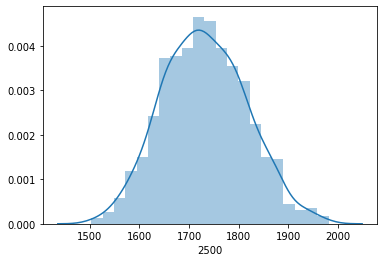

In [167]:
sns.distplot(df[2500]);

Scale the Features

In [168]:
#get all the columns of the dataframe
columnsToScale=list(df.columns)
#ignore the last column as it is the target
columnsToScale=columnsToScale[:-1]
#Define the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#Scale the features in the range of 0-1
df[columnsToScale] = scaler.fit_transform(df[columnsToScale])

In [169]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.284519,1.000000,0.551148,0.010438,0.583682,0.041754,0.680585,0.183716,0.354906,0.916318,0.705637,0.626305,0.217119,0.152401,0.548117,0.173278,0.091858,0.528184,0.897490,0.427975,0.974948,0.070981,0.995825,0.834728,0.390397,0.384134,0.323591,0.841336,0.585774,0.000000,0.597077,0.248434,0.697286,0.033403,0.638831,0.123173,0.678497,0.866388,0.574113,0.883090,...,0.617954,0.020921,0.450939,0.569937,0.439331,0.386221,0.968685,0.118998,0.144050,0.722338,0.459290,0.832985,0.427975,0.636743,0.242171,0.405010,0.008351,0.135699,0.943633,0.956159,0.939457,0.732777,0.279749,0.814196,0.739040,0.154812,0.782881,0.935282,0.010438,0.615866,0.684760,0.608787,0.835073,0.574113,0.640919,0.100209,0.524008,0.588727,0.056367,1606.0
1,0.133891,0.054280,0.526096,0.066806,0.644351,0.411273,0.766180,0.181628,0.661795,0.102510,0.373695,0.776618,0.966597,0.277662,0.539749,0.701461,0.630480,0.277662,0.207113,0.167015,0.114823,0.323591,0.379958,0.797071,0.795407,0.847599,0.100209,0.561587,0.663180,0.501044,0.772443,0.004175,0.567850,0.496868,0.682672,0.732777,0.144050,0.012526,0.899791,0.885177,...,0.025052,0.550209,0.778706,0.288100,0.309623,0.484342,0.707724,0.260960,0.580376,0.553236,0.839248,0.843424,0.482255,0.114823,0.749478,0.480167,0.407098,0.455115,0.680585,0.237996,0.713987,0.411273,0.797495,0.947808,0.814196,0.510460,0.254697,0.208768,0.286013,0.885177,0.004175,0.828452,0.772443,0.096033,0.478079,0.553236,0.277662,0.989562,0.423800,1714.0
2,0.100418,0.793319,0.288100,0.697286,0.771967,0.937370,0.924843,0.565762,0.267223,0.458159,0.745303,0.569937,0.039666,0.557411,0.924686,0.956159,0.997912,0.062630,0.391213,0.661795,0.275574,0.640919,0.684760,0.343096,0.375783,0.271399,0.726514,0.893528,0.983264,0.417537,0.822547,0.530271,0.254697,0.741127,0.008351,0.532359,0.588727,0.933194,0.766180,0.300626,...,0.194154,0.941423,0.885177,0.471816,0.244770,0.202505,0.448852,0.386221,0.286013,0.093946,0.626305,0.250522,0.820459,0.795407,0.010438,0.396660,0.469729,0.125261,0.835073,0.281837,0.229645,0.597077,0.972860,0.559499,0.603340,0.926778,0.941545,0.496868,0.265136,0.388309,0.102296,0.234310,0.006263,0.983299,0.181628,0.580376,0.442589,0.336117,0.799582,1936.0
3,0.794979,0.267223,0.008351,0.204593,0.935146,0.674322,0.356994,0.868476,0.344468,0.483264,0.914405,0.110647,0.377871,0.766180,0.294979,0.741127,0.728601,0.421712,0.508368,0.031315,0.910230,0.910230,0.323591,0.851464,0.006263,0.874739,0.394572,0.327766,0.401674,0.661795,0.540710,0.849687,0.258873,0.083507,0.778706,0.672234,0.091858,0.006263,0.891441,0.127349,...,0.018789,0.920502,0.849687,0.624217,0.556485,0.455115,0.269311,0.613779,0.847599,0.286013,0.755741,0.883090,0.250522,0.148225,0.843424,0.993737,0.901879,0.939457,0.121086,0.081420,0.185804,0.436326,0.060543,0.943633,0.929019,0.847280,0.212944,0.382046,0.390397,0.085595,0.540710,0.054393,0.148225,0.106472,0.198330,0.087683,0.325678,0.793319,0.908142,1811.0
4,0.016736,0.544885,0.294363,0.430063,0.096234,0.118998,0.196242,0.411273,0.837161,0.112971,0.981211,0.453027,0.517745,0.594990,0.244770,0.135699,0.037578,0.544885,0.797071,0.751566,0.430063,0.755741,0.066806,0.297071,0.695198,0.768267,0.688935,0.363257,0.043933,0.889353,0.799582,0.676409,0.352818,0.231733,0.716075,0.344468,0.300626,0.565762,0.741127,0.221294,...,0.390397,0.196653,0.356994,0.077244,0.583682,0.185804,0.016701,0.605428,0.803758,0.908142,0.858038,0.415449,0.937370,0.513570,0.012526,0.037578,0.839248,0.751566,0.954071,0.622129,0.847599,0.478079,0.288100,0.352818,0.966597,0.956067,0.828810,0.876827,0.002088,0.311065,0.893528,0.472803,0.064718,0.553236,0.296451,0.787056,0.085595,0.739040,0.388309,1890.0
5,0.822176,0.855950,0.899791,0.937370,0.211297,0.887265,0.141962,

Train & Test Data split

In [170]:
#Split Dataset in 80:20. 
#Random state is mentioned so that the partition remain same for each execution
X = df.iloc[:, 0:len(df.columns)-1].values
Y = df[2500].values
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=2003)

Performance Metrics

In [171]:
#Define the performance metrics (r2score and RMSE) using the Sklearn Lib
def showResults(test, pred):
  mse=mean_squared_error(test, pred)
  rmse = sqrt(mse)
  r2=r2_score(test, pred)
  print("RMSE: ", rmse)
  print("R2Score: ",r2)
  result=[rmse,r2]
  return result

# ANN Model

ANN Model Defination

In [172]:
#Define the model
verbose, epochs, batch_size = 1, 50, 32
activationFunction='relu'

def getANNModel():
    annmodel = Sequential()
    annmodel.add(Dense(32, input_dim = X.shape[1], activation=activationFunction))
    annmodel.add(Dense(32, activation=activationFunction))
    annmodel.add(Dense(1, activation='linear'))
    annmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return annmodel
annmodel = getANNModel()

In [173]:
annmodel.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                80032     
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 33        
Total params: 81,121
Trainable params: 81,121
Non-trainable params: 0
_________________________________________________________________


Train the ANN model using KFold Validation

In [174]:
#Apply 7-Fold cross Validation to train the model
annCv = KFold(n_splits=7, shuffle = True , random_state=10)
annCv.get_n_splits(xTrain, yTrain)
foldNum=0
#Dividing the training data again in Training and Validation
for train_index, val_index in annCv.split(xTrain, yTrain):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    annhistory = annmodel.fit(X_train, Y_train, 
                        validation_data = (X_val, Y_val), 
                        epochs=epochs, 
                        batch_size=batch_size)  
    yPredict = annmodel.predict(X_val)
    showResults(Y_val, yPredict)


Results for fold 1
Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 2921149.2500 - val_loss: 2838273.5000
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 2629933.0000 - val_loss: 2428138.0000
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 2113636.7500 - val_loss: 1784165.6250
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 1395446.2500 - val_loss: 996745.3125
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 645641.4375 - val_loss: 330652.3125
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 154024.4375 - val_loss: 40820.8086
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 13809.9590 - val_loss: 7352.4858
Epoch 8/50
22/22 [==============================] - 0s 4ms/step - loss: 7367.6226 - val_loss: 7442.7998
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 6961.7490 - val_loss: 7448.6440
Epoch 10/50
22

Save and Load the ANN model

In [175]:
annmodel.save("/content/drive/My Drive/Smart Health/Assignment_2/Assignment 2 - Question/0892691-ANN.h5")

In [176]:
annmodel=load_model("/content/drive/My Drive/Smart Health/Assignment_2/Assignment 2 - Question/0892691-ANN.h5")

Test the ANN model

In [177]:
#Test the model and calculate the performance metrics
ann_yPred = annmodel.predict(xTest)
ann_perf_metrics=showResults(yTest, ann_yPred)

RMSE:  39.49130901336943
R2Score:  0.7501263516757799


Plot Actual value vs Predicted value

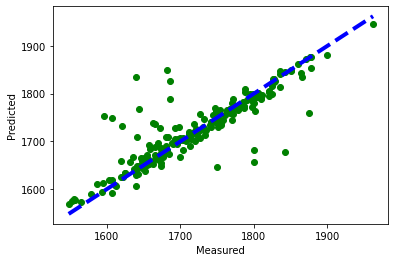

In [189]:
#In ideal case if the actual value matches the predicted value 
#we would get a diagonal on the graph on mapping (actual,predicted) point
#thus in the below graph we plot the diagonal 
#and then map the (actual,predicted) point to see the deviation
fig, ax = plt.subplots()
ax.scatter(yTest, ann_yPred,color='green')
ax.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()],'k--',color='blue',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
#plt.show()
plt.savefig('/content/drive/My Drive/Smart Health/Assignment_2/Assignment 2 - Question/ANN.png', format='png', dpi=1200)

# CNN Model

Reshape the data to 3D for Conv1D

In [179]:
xTrain=xTrain.reshape(xTrain.shape[0],xTrain.shape[1],1)
xTest=xTest.reshape(xTest.shape[0],xTest.shape[1],1)
print(xTest.shape)
print(xTrain.shape)

(200, 2500, 1)
(800, 2500, 1)


CNN Model Defination

In [180]:
#Define the Conv1d Model
verbose, epochs, batch_size = 1, 100, 32
activationFunction='relu'

def getCNNModel():
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(32, 2, activation="relu", input_shape=(xTrain.shape[1],xTrain.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation="relu"))
    cnnmodel.add(Dense(1))
    cnnmodel.compile(loss="mse", optimizer="adam")
    return cnnmodel

cnnmodel = getCNNModel()

In [181]:
cnnmodel.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 2499, 32)          96        
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 1249, 32)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 1249, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 39968)             0         
_________________________________________________________________
dense_55 (Dense)             (None, 64)                2558016   
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 65        
Total params: 2,558,177
Trainable params: 2,558,177
Non-trainable params: 0
___________________________________________

Train the CNN model using KFold Validation

In [182]:
#Apply K-Fold cross Validation to train the model
cnnCv = KFold(n_splits=5, shuffle = True , random_state=10)
cnnCv.get_n_splits(xTrain, yTrain)
foldNum=0
for train_index, val_index in cnnCv.split(xTrain, yTrain):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
    X_val=X_val.reshape(X_val.shape[0],X_val.shape[1],1)
    
    cnnhistory = cnnmodel.fit(X_train, Y_train, 
                        validation_data = (X_val, Y_val), 
                        epochs=epochs, 
                        batch_size=batch_size)  
    yPredict = cnnmodel.predict(X_val)
    showResults(Y_val, yPredict)

Results for fold 1
Epoch 1/100
20/20 [==============================] - 0s 9ms/step - loss: 2398827.5000 - val_loss: 1624448.7500
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 789719.9375 - val_loss: 100608.5312
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 38047.7109 - val_loss: 34491.3906
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 14739.4639 - val_loss: 12498.3008
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 8724.8896 - val_loss: 6924.0479
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 7582.9688 - val_loss: 7120.5171
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 7425.8076 - val_loss: 6945.9922
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 7400.6655 - val_loss: 6985.6045
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 7376.7041 - val_loss: 7001.0664
Epoch 10/100
20/20 [==

Save and Load the CNN model

In [183]:
cnnmodel.save("/content/drive/My Drive/Smart Health/Assignment_2/Assignment 2 - Question/0892691-CNN.h5")

In [184]:
cnnmodel=load_model("/content/drive/My Drive/Smart Health/Assignment_2/Assignment 2 - Question/0892691-CNN.h5")

Test the CNN model

In [185]:
#Test the model and calculate the performance metrics
cnn_yPred = cnnmodel.predict(xTest)
cnn_perf_metrics=showResults(yTest, cnn_yPred)

RMSE:  37.43859771275274
R2Score:  0.7754275142935152


Plot Actual value vs Predicted value

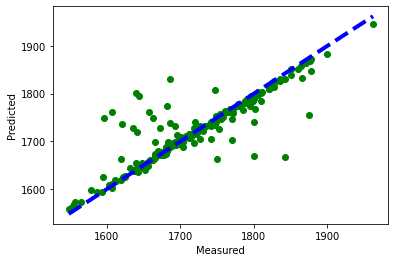

In [190]:
##In ideal case if the actual value matches the predicted value 
#we would get a diagonal on the graph on mapping (actual,predicted) point
#thus in the below graph we plot the diagonal 
#and then map the (actual,predicted) point to see the deviation
fig, ax = plt.subplots()
ax.scatter(yTest, cnn_yPred,color='green')
ax.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()],'k--',color='blue',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
#plt.show()
plt.savefig('/content/drive/My Drive/Smart Health/Assignment_2/Assignment 2 - Question/CNN.png', format='png', dpi=1200)

In [187]:
perf_metrics=pd.DataFrame({"ANN":[ann_perf_metrics[0],ann_perf_metrics[1]], 
                 "CNN":[cnn_perf_metrics[0],cnn_perf_metrics[1]]}) 
perf_metrics.index=['RMSE','R2Score']

In [188]:
perf_metrics

,ANN,CNN
RMSE,39.491309,37.438598
R2Score,0.750126,0.775428
